# Elon Musk Tweets Sentiment(Classified via RoBERTa)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("ElonTweets(Sentiment).csv")#https://www.kaggle.com/datasets/alexhuggler/elon-tweets-wsentimentclassified-via-roberta?select=ElonTweets%28Sentiment%29.csv

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,True,2022-09-29,MuskUniversity,"['neutral', 0.6005306]"
1,1,1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['neutral', 0.8452575]"
2,2,2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,True,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]"
3,3,3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['positive', 0.6118259]"
4,4,4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,True,2022-09-29,phibetakitten,"['neutral', 0.85970926]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17597,17597,17597,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,27,9,50,en,Twitter for iPhone,107415763,122,True,2011-12-03,_,"['negative', 0.5067324]"
17598,17598,17598,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,23,29,50,en,Twitter for iPhone,107415763,122,True,2011-12-03,_,"['positive', 0.55860823]"
17599,17599,17599,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,74,en,Twitter Web Client,107415763,122,True,2011-12-01,_,"['neutral', 0.6384011]"
17600,17600,17600,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,107415714,122,True,2011-12-01,_,"['positive', 0.9733198]"


In [10]:
for i in range(17602):
    df["neutral"][i]=df["sentiment"][i][4]

In [11]:
df

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,neutral
0,0,0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,True,2022-09-29,MuskUniversity,"['neutral', 0.6005306]",u
1,1,1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['neutral', 0.8452575]",u
2,2,2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,True,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]",u
3,3,3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['positive', 0.6118259]",s
4,4,4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,True,2022-09-29,phibetakitten,"['neutral', 0.85970926]",u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17597,17597,17597,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,27,9,50,en,Twitter for iPhone,107415763,122,True,2011-12-03,_,"['negative', 0.5067324]",g
17598,17598,17598,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,23,29,50,en,Twitter for iPhone,107415763,122,True,2011-12-03,_,"['positive', 0.55860823]",s
17599,17599,17599,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,74,en,Twitter Web Client,107415763,122,True,2011-12-01,_,"['neutral', 0.6384011]",u
17600,17600,17600,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,107415714,122,True,2011-12-01,_,"['positive', 0.9733198]",s


In [12]:
df["Text"]=df["Text"].str.lower() #We convert our texts to lowercase.
df["Text"]=df["Text"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["Text"]=df["Text"].str.replace("\d+","") #We are removing numbers from our texts.
df["Text"]=df["Text"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.
df_neutral=df[df['neutral']=="u"]
df_positive=df[df['neutral']=="s"]
df_negative=df[df['neutral']=="g"]
df["neutral"]=df["neutral"].map({"s":1,"g":0,"u":2})
df['neutral']=df['neutral'].astype(int)
df1=df[df['neutral']!=2]
#We replace negative texts with 0 and positive texts with 1.

In [13]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df1.Text
y=df1.neutral
x=vect.fit_transform(x)

In [14]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos=[k,d,r,l,mb]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','MultinomialNB']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [15]:
sentiment_classification_funct(x,y)

(5858, 14273) (1465, 14273) (5858,) (1465,)


,f1_score,recall_score,precision_score,accuracy_score
MultinomialNB,0.909338,0.933023,0.886826,0.863481
LogisticRegression,0.904594,0.952558,0.861228,0.852560
RandomForestClassifier,0.898475,0.959070,0.845082,0.840956
DecisionTreeClassifier,0.873009,0.892093,0.854724,0.809556
KNeighborsClassifier,0.848509,0.992558,0.740972,0.739932


In [16]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("elon-musk.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
#We draw the most used words in tweets on a Elon Musk.

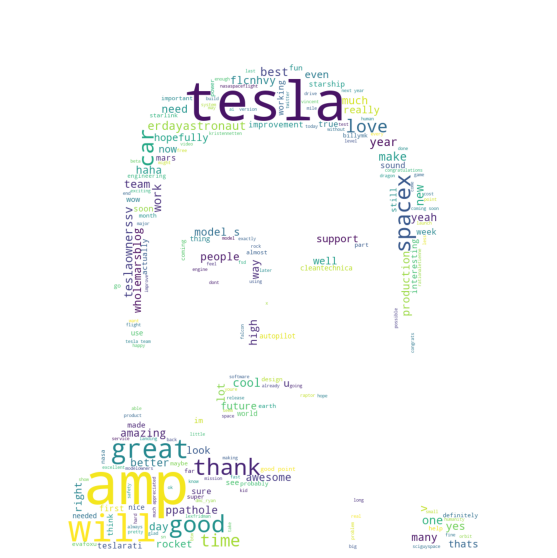

In [19]:
wc(df_positive.Text,"white")##Positive

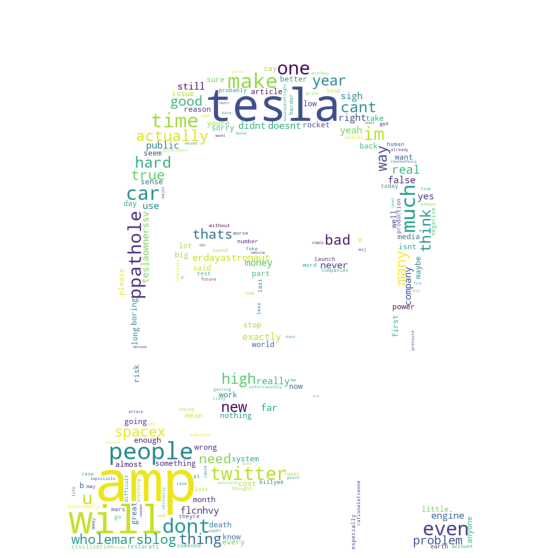

In [20]:
wc(df_negative.Text,"white")##Negative

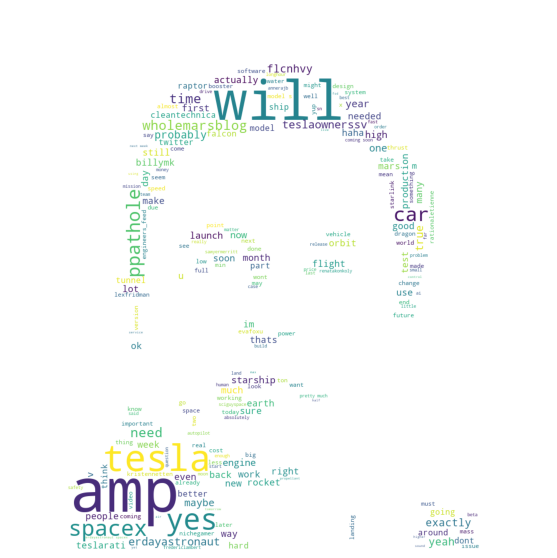

In [21]:
wc(df_neutral.Text,"white")##Neutral

In [22]:
sent=df[["Text","neutral"]]

In [23]:
def detect_sentiment(Text):
    return TextBlob(Text).sentiment.polarity
#We are doing our sentiment analysis.

In [24]:
sent["sentiment"]=sent["Text"].apply(detect_sentiment)
sent.head()

,Text,neutral,sentiment
0,muskuniversity true,2,0.35
1,needs be able to get from starbase to south pa...,2,0.50
2,wholemarsblog offlabel use,2,0.00
3,cybertruck will be waterproof enough to serve ...,1,-0.05
4,phibetakitten submarines use electric motors u...,2,0.00


In [25]:
def sentiment2(sent):
    if (sent< -0.02):
        return 3
    elif sent>0.02:
        return 1
    else:
        return 0
#We divide the texts into three groups positive, negative and nötr.

In [26]:
sent["sent"]=sent["sentiment"].apply(sentiment2)
sent.head()

,Text,neutral,sentiment,sent
0,muskuniversity true,2,0.35,1
1,needs be able to get from starbase to south pa...,2,0.50,1
2,wholemarsblog offlabel use,2,0.00,0
3,cybertruck will be waterproof enough to serve ...,1,-0.05,3
4,phibetakitten submarines use electric motors u...,2,0.00,0


In [28]:
sent.sentiment.value_counts()

 0.000000    7488
 0.500000     809
 0.200000     605
 0.250000     524
 0.350000     420
             ... 
 0.033889       1
 0.293109       1
-0.040476       1
 0.026389       1
 0.612121       1
Name: sentiment, Length: 1924, dtype: int64